In [1]:
# Data from here:
# https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

import glob
import os

In [2]:
# READ, RENAME
covid = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-08-27.xlsx")
# REPLACED WITH THE CODE BELOW THAT EXTRACTS THE LATEST .xlsx FILE IN THE FOLDER

# list_of_files = glob.glob('C:\\Users\\nikan\\Desktop\\COVID_daily/*xlsx') # * means all if need specific format then *.csv
# latest_file = max(list_of_files, key=os.path.getctime)
# print(latest_file)
# covid = pd.read_excel(latest_file) 

covid.rename(columns = {'dateRep': 'DateRep', 'day':'Day', 'month':'Month','year':'Year','cases':'Cases','deaths':'Deaths', 'popData2019':'Population', 'countriesAndTerritories': 'Country', 'continentExp':'Continent'}, inplace = True)

In [3]:
covid_daily_per_continent = covid.groupby(['DateRep','Continent'])[['Cases', 'Deaths']].sum()
covid_daily_per_continent

Cases  Deaths
DateRep    Continent                
2019-12-31 Africa          0       0
           America         0       0
           Asia           27       0
           Europe          0       0
           Oceania         0       0
...                      ...     ...
2020-08-27 Africa       8870     321
           America    132035    3953
           Asia       103082    1597
           Europe      23931     394
           Oceania       338      24

[1269 rows x 2 columns]

In [4]:
covid_daily_per_continent_cumulative = covid_daily_per_continent.groupby(['Continent']).cumsum()
covid_daily_per_continent.reset_index(inplace=True)
covid_daily_per_continent_cumulative.reset_index(inplace=True)
covid_daily_per_continent_cumulative

,DateRep,Continent,Cases,Deaths
0,2019-12-31,Africa,0,0
1,2019-12-31,America,0,0
2,2019-12-31,Asia,27,0
3,2019-12-31,Europe,0,0
4,2019-12-31,Oceania,0,0
...,...,...,...,...
1264,2020-08-27,Africa,1212699,28609
1265,2020-08-27,America,12910547,455566
1266,2020-08-27,Asia,6529270,133503
1267,2020-08-27,Europe,3522921,207818


In [5]:
covid_daily_global = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum()
covid_daily_global.reset_index(inplace=True)
covid_daily_global

,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0
...,...,...,...
236,2020-08-23,266465,5633
237,2020-08-24,224497,3322
238,2020-08-25,220357,4538
239,2020-08-26,254705,6374


In [6]:
covid_daily_global_cumulative = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum().cumsum()
covid_daily_global_cumulative.reset_index(inplace=True)
covid_daily_global_cumulative

,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,27,0
2,2020-01-02,27,0
3,2020-01-03,44,0
4,2020-01-04,44,0
...,...,...,...
236,2020-08-23,23236871,805567
237,2020-08-24,23461368,808889
238,2020-08-25,23681725,813427
239,2020-08-26,23936430,819801


In [7]:
# TO CONVERT THE MILLIONS IN THE Y-AXIS TO 1M, 2M, etc
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fM' % (x * 1e-6)
formatter_mil = FuncFormatter(millions)

# TO CONVERT THE THOUSANDS IN THE Y-AXIS TO 1K, 2K, etc
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fk' % (x * 1e-3)
formatter_kil = FuncFormatter(thousands)

In [8]:
# TO PLOT MTH IN THE X-AXIS
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

In [9]:
last_day_covid = covid_daily_per_continent[covid_daily_per_continent['DateRep'] == covid_daily_per_continent['DateRep'].max()]
last_day_covid_cumulative = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['DateRep'] == covid_daily_per_continent_cumulative['DateRep'].max()]
continents = last_day_covid['Continent'].to_list()

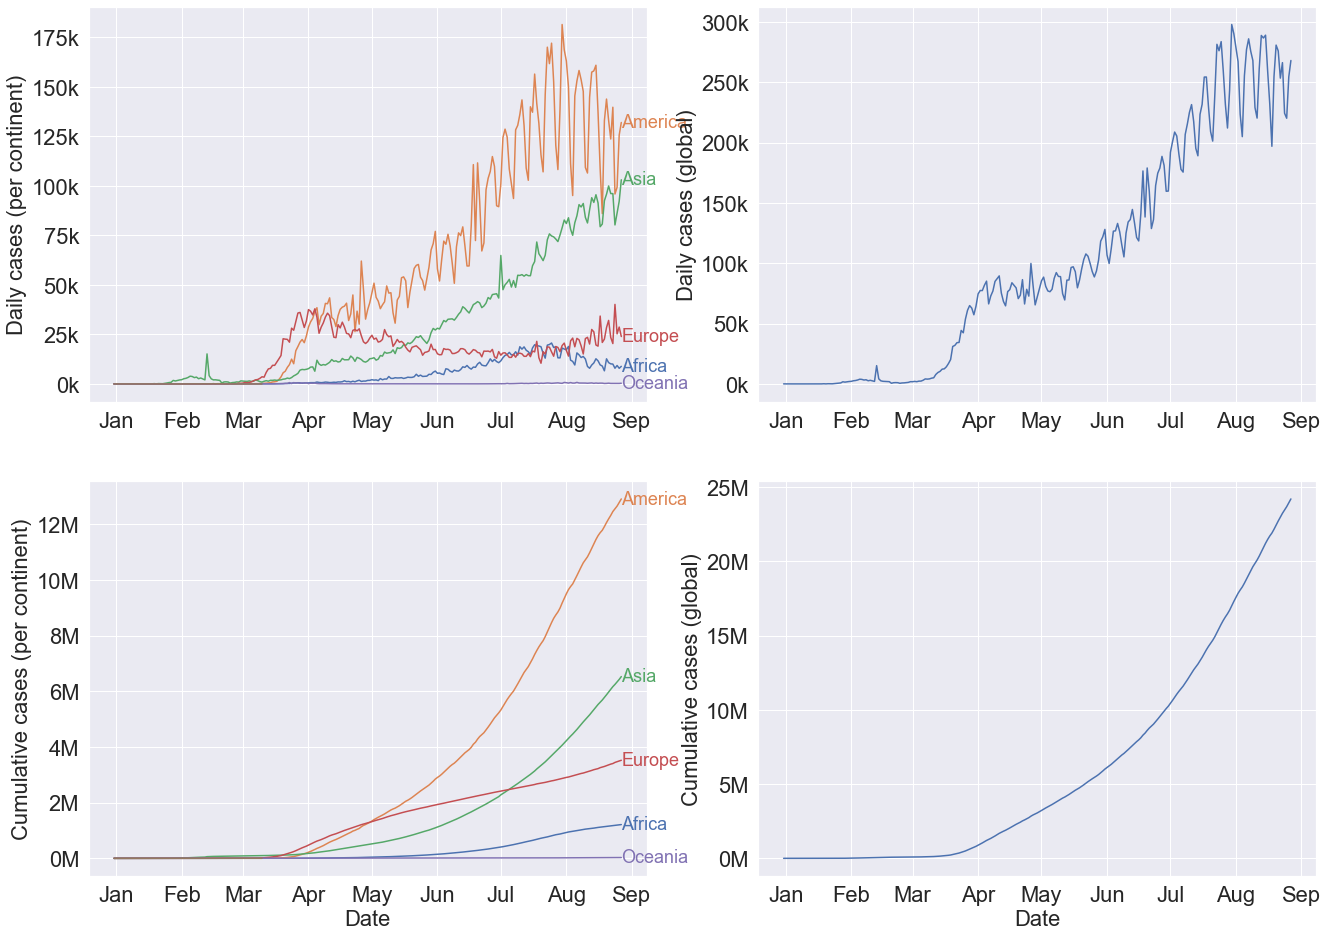

In [10]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('covid_h_Infection_rate_per_continent.png')

Task 4 daily cases with the smoothed daily cases in the top 2 graphs.

In [11]:
covid_daily_global_1 = covid_daily_global.rolling(7).mean()
covid_daily_global_1['DateRep'] = covid_daily_global['DateRep']
covid_daily_global_1

C:\Users\61906\AppData\Local\Temp\ipykernel_19948\3545958458.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DateRep'], dtype='object')
  covid_daily_global_1 = covid_daily_global.rolling(7).mean()


,Cases,Deaths,DateRep
0,NaN,NaN,2019-12-31
1,NaN,NaN,2020-01-01
2,NaN,NaN,2020-01-02
3,NaN,NaN,2020-01-03
4,NaN,NaN,2020-01-04
...,...,...,...
236,251633.857143,5657.000000,2020-08-23
237,250541.285714,5528.428571,2020-08-24
238,253867.714286,5567.857143,2020-08-25
239,253838.714286,5523.714286,2020-08-26


In [12]:
back_calc = 7
slope_df = pd.DataFrame(columns=['Continent', 'Days_from_0', 'Day_x', 'Slope', 'R2', 'P_value'])

for continent in continents:
    one_continent_data = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['Continent'] == str(continent)].reset_index(drop=True)
    one_continent_data['Day_0'] = one_continent_data['DateRep'][0]
    one_continent_data['Days_from_0'] = (one_continent_data['DateRep'] - one_continent_data['Day_0']).dt.days
    one_continent_data['Day_x'] = one_continent_data['DateRep']

    for i in np.arange(back_calc, len(one_continent_data)+1):
        x = one_continent_data.loc[i-back_calc: i, 'Days_from_0'] # That is the 'Days_from_0'
        y = one_continent_data.loc[i-back_calc: i, 'Cases'] #
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        one_continent_data.loc[i+1, 'Slope'] = slope
        one_continent_data.loc[i+1, 'R2'] = r_value * r_value
        one_continent_data.loc[i+1, 'P_value'] = p_value
        one_continent = one_continent_data[['Continent', 'Days_from_0', 'Day_x', 'Slope', 'R2', 'P_value']]

    slope_df = slope_df.append(one_continent, ignore_index=False)

slope_df.head(15)

C:\Users\61906\AppData\Local\Temp\ipykernel_19948\2677228792.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slope_df = slope_df.append(one_continent, ignore_index=False)
C:\Users\61906\AppData\Local\Temp\ipykernel_19948\2677228792.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slope_df = slope_df.append(one_continent, ignore_index=False)
C:\Users\61906\AppData\Local\Temp\ipykernel_19948\2677228792.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slope_df = slope_df.append(one_continent, ignore_index=False)
C:\Users\61906\AppData\Local\Temp\ipykernel_19948\2677228792.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sl

,Continent,Days_from_0,Day_x,Slope,R2,P_value
0,Africa,0.0,2019-12-31 00:00:00,NaN,NaN,NaN
1,Africa,1.0,2020-01-01 00:00:00,NaN,NaN,NaN
2,Africa,2.0,2020-01-02 00:00:00,NaN,NaN,NaN
3,Africa,3.0,2020-01-03 00:00:00,NaN,NaN,NaN
4,Africa,4.0,2020-01-04 00:00:00,NaN,NaN,NaN
5,Africa,5.0,2020-01-05 00:00:00,NaN,NaN,NaN
6,Africa,6.0,2020-01-06 00:00:00,NaN,NaN,NaN
7,Africa,7.0,2020-01-07 00:00:00,NaN,NaN,NaN
8,Africa,8.0,2020-01-08 00:00:00,0.0,0.0,1.0
9,Africa,9.0,2020-01-09 00:00:00,0.0,0.0,1.0


In [13]:
slope_df.index = range(len(slope_df))
slope_df.sort_values(by='Day_x')
slope_df

,Continent,Days_from_0,Day_x,Slope,R2,P_value
0,Africa,0.0,2019-12-31 00:00:00,NaN,NaN,NaN
1,Africa,1.0,2020-01-01 00:00:00,NaN,NaN,NaN
2,Africa,2.0,2020-01-02 00:00:00,NaN,NaN,NaN
3,Africa,3.0,2020-01-03 00:00:00,NaN,NaN,NaN
4,Africa,4.0,2020-01-04 00:00:00,NaN,NaN,NaN
...,...,...,...,...,...,...
1210,Oceania,238.0,2020-08-25 00:00:00,277.952381,0.996977,0.0
1211,Oceania,239.0,2020-08-26 00:00:00,270.142857,0.997962,0.0
1212,Oceania,240.0,2020-08-27 00:00:00,269.130952,0.997737,0.0
1213,NaN,NaN,NaT,269.5,0.997662,0.0


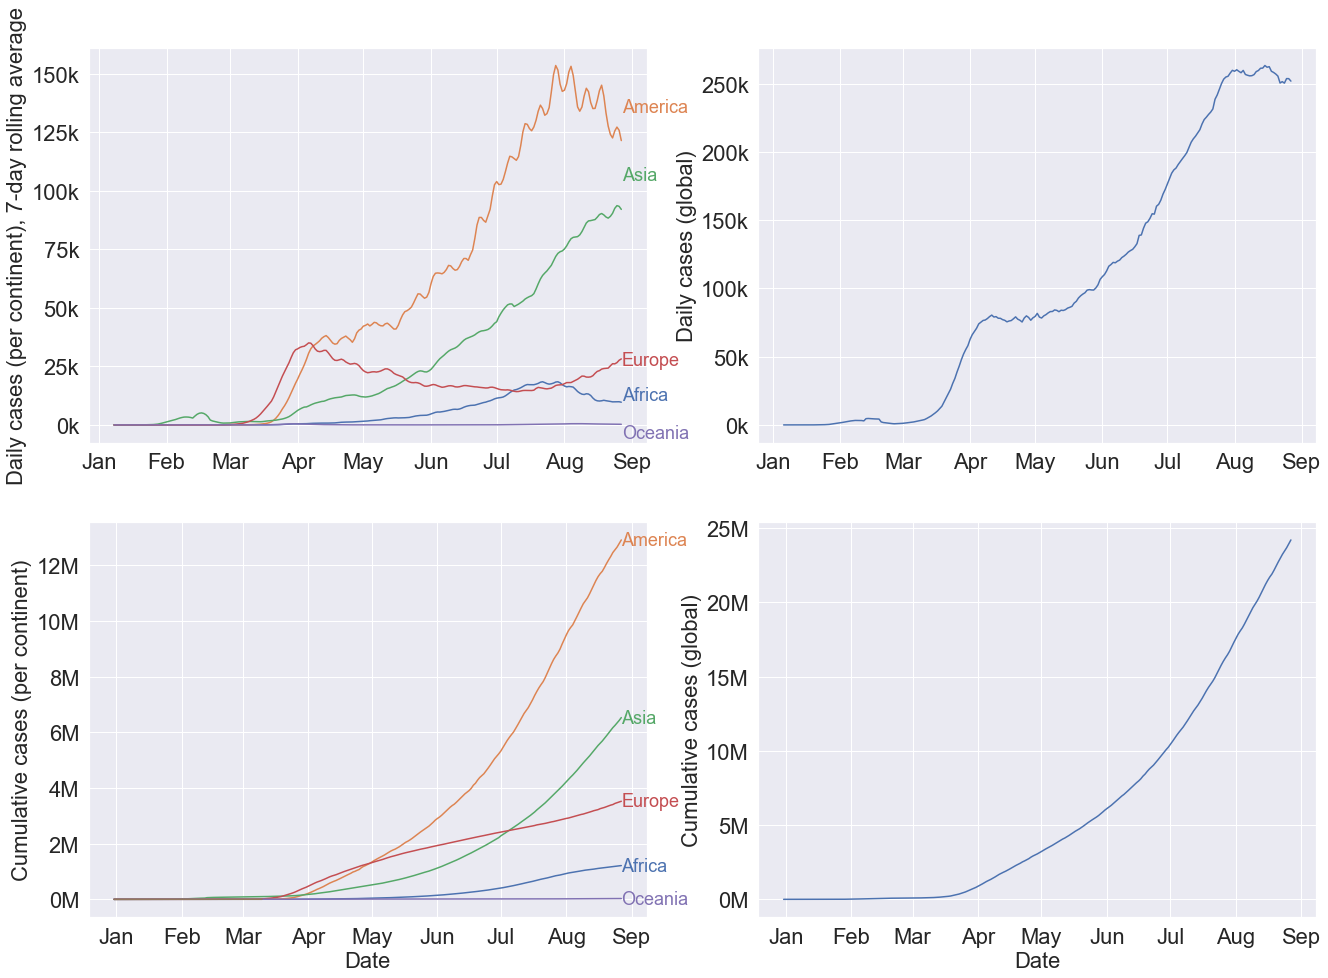

In [14]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

ax1 = sns.lineplot(x="Day_x", y="Slope", hue="Continent", data=slope_df, markers=True, legend=False, ax=axes[0, 0])
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
adjust_text(texts1)
axes[0, 0].set_ylabel("Daily cases (per continent), 7-day rolling average",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_1, markers=True, legend=False, ax=axes[0, 1])
axes[0, 1].set_ylabel("Daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1])
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Fig_4_1_Jiayang_Lai.png')

Daily mortalities and the cumulative mortalities.

In [15]:
back_calc = 7
slope_df = pd.DataFrame(columns=['Continent', 'Days_from_0', 'Day_x', 'Slope', 'R2', 'P_value'])

for continent in continents:
    one_continent_data = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['Continent'] == str(continent)].reset_index(drop=True)
    one_continent_data['Day_0'] = one_continent_data['DateRep'][0]
    one_continent_data['Days_from_0'] = (one_continent_data['DateRep'] - one_continent_data['Day_0']).dt.days
    one_continent_data['Day_x'] = one_continent_data['DateRep']

    for i in np.arange(back_calc, len(one_continent_data)+1):
        x = one_continent_data.loc[i-back_calc: i, 'Days_from_0'] # That is the 'Days_from_0'
        y = one_continent_data.loc[i-back_calc: i, 'Deaths'] #
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        one_continent_data.loc[i+1, 'Slope'] = slope
        one_continent_data.loc[i+1, 'R2'] = r_value * r_value
        one_continent_data.loc[i+1, 'P_value'] = p_value
        one_continent = one_continent_data[['Continent', 'Days_from_0', 'Day_x', 'Slope', 'R2', 'P_value']]

    slope_df = slope_df.append(one_continent, ignore_index=False)

slope_df.head(15)

C:\Users\61906\AppData\Local\Temp\ipykernel_19948\3885947586.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slope_df = slope_df.append(one_continent, ignore_index=False)
C:\Users\61906\AppData\Local\Temp\ipykernel_19948\3885947586.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slope_df = slope_df.append(one_continent, ignore_index=False)
C:\Users\61906\AppData\Local\Temp\ipykernel_19948\3885947586.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  slope_df = slope_df.append(one_continent, ignore_index=False)
C:\Users\61906\AppData\Local\Temp\ipykernel_19948\3885947586.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sl

,Continent,Days_from_0,Day_x,Slope,R2,P_value
0,Africa,0.0,2019-12-31 00:00:00,NaN,NaN,NaN
1,Africa,1.0,2020-01-01 00:00:00,NaN,NaN,NaN
2,Africa,2.0,2020-01-02 00:00:00,NaN,NaN,NaN
3,Africa,3.0,2020-01-03 00:00:00,NaN,NaN,NaN
4,Africa,4.0,2020-01-04 00:00:00,NaN,NaN,NaN
5,Africa,5.0,2020-01-05 00:00:00,NaN,NaN,NaN
6,Africa,6.0,2020-01-06 00:00:00,NaN,NaN,NaN
7,Africa,7.0,2020-01-07 00:00:00,NaN,NaN,NaN
8,Africa,8.0,2020-01-08 00:00:00,0.0,0.0,1.0
9,Africa,9.0,2020-01-09 00:00:00,0.0,0.0,1.0


In [16]:
slope_df.index = range(len(slope_df))

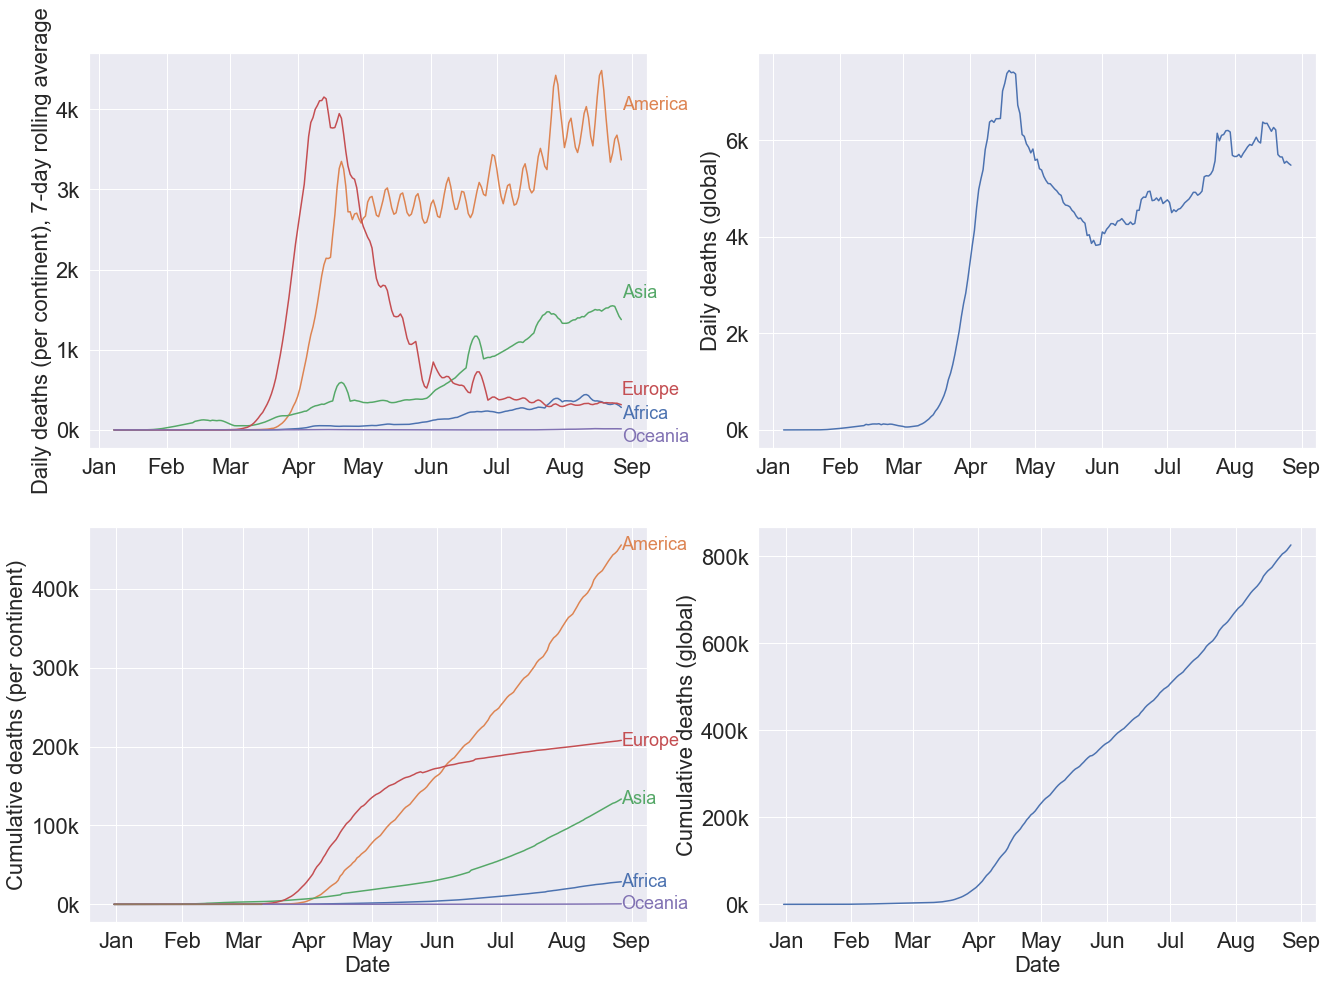

In [17]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

ax1 = sns.lineplot(x="Day_x", y="Slope", hue="Continent", data=slope_df, markers=True, legend=False, ax=axes[0, 0])
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
adjust_text(texts1)
axes[0, 0].set_ylabel("Daily deaths (per continent), 7-day rolling average",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Deaths", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative deaths (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_kil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global_1, markers=True, legend=False, ax=axes[0, 1])
axes[0, 1].set_ylabel("Daily deaths (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1])
axes[1, 1].set_ylabel("Cumulative deaths (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_kil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Fig_4_2_Jiayang_Lai.png')